# Prevendo o preço de uma pizza de acordo com o seu diâmetro

In [68]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Diâmetros (cm)
Diametros = np.array([7, 10, 15, 30, 45])

# Preços (R$)
Precos = np.array([8, 11, 16, 38.5, 52])

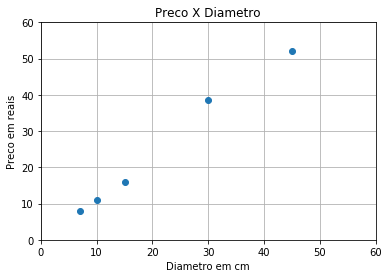

In [69]:
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Preco X Diametro')
plt.plot(Diametros,Precos,'o')
plt.axis([0,60,0,60])
plt.grid()
plt.show()

In [70]:
from sklearn import linear_model

In [71]:
modelo_LR = linear_model.LinearRegression()

In [72]:
#Mudando o formato do array onde cada linha representa um exemplo
Diametros = np.reshape(Diametros,(-1,1))

modelo_LR.fit(Diametros,Precos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
print(Diametros.reshape(1,-1))
print(Precos)

[[ 7 10 15 30 45]]
[ 8.  11.  16.  38.5 52. ]


In [74]:
print(modelo_LR.predict(5))

[5.35077289]


In [75]:
print('Equacao: Y = W0 + Coeficiente*X')
print('Coeficiente = ' + str(modelo_LR.coef_))
print('W0 = ' + str(modelo_LR.intercept_))

Equacao: Y = W0 + Coeficiente*X
Coeficiente = [1.20422117]
W0 = -0.6703329369797864


In [76]:
from sklearn.metrics import mean_squared_error

print("Mean squared error = ", mean_squared_error(Precos,modelo_LR.predict(Diametros)))

Mean squared error =  2.7420035671819223


# A Linha em laranja representa os valores preditos pelo modelo treinado

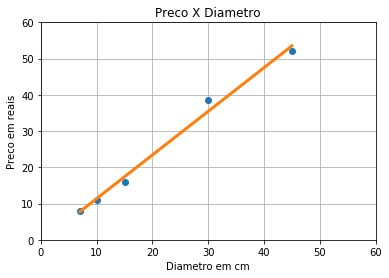

In [77]:
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Preco X Diametro')
plt.plot(Diametros,Precos,'o')
plt.plot(Diametros,modelo_LR.predict(Diametros),linewidth=3)
plt.axis([0,60,0,60])
plt.grid()
plt.show()

# Treinando um modelo de regressão polinomial

In [78]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2

modelo_polinomial = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial.fit(Diametros, Precos)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [79]:
print("Mean squared error = ", mean_squared_error(Precos,modelo_polinomial.predict(Diametros)))

Mean squared error =  1.7647158689988434


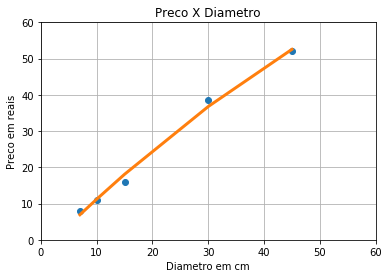

In [80]:
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Preco X Diametro')
plt.plot(Diametros,Precos,'o')
plt.plot(Diametros,modelo_polinomial.predict(Diametros),linewidth=3)
plt.axis([0,60,0,60])
plt.grid()
plt.show()